<a href="https://colab.research.google.com/github/sejalraikwa/quantium-data-insights/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/QVI_transaction_data.xlsx')

# 1. Basic Data Understanding

In [ ]:
print(df.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER  \
0  43390          1            1000  YOUNG SINGLES/COUPLES          Premium   
1  43359          1            1002  YOUNG SINGLES/COUPLES       Mainstream   
2  43531          1            1003         YOUNG FAMILIES           Budget   
3  43532          1            1003         YOUNG FAMILIES           Budget   
4  43406          1            1004  OLDER SINGLES/COUPLES       Mainstream   

                                PROD_NAME  PROD_NBR  PROD_QTY  TXN_ID  \
0  Natural Chip        Compny SeaSalt175g         5         2       1   
1   Red Rock Deli Chikn&Garlic Aioli 150g        58         1       2   
2   Grain Waves Sour    Cream&Chives 210G        52         1       3   
3  Natural ChipCo      Hony Soy Chckn175g       106         1       4   
4          WW Original Stacked Chips 160g        96         1       5   

   TOT_SALES  
0        6.0  
1        2.7  
2        3.6  
3        3.0  
4        1.

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   LIFESTAGE         264836 non-null  object 
 4   PREMIUM_CUSTOMER  264836 non-null  object 
 5   PROD_NAME         264836 non-null  object 
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_QTY          264836 non-null  int64  
 8   TXN_ID            264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_QTY,TXN_ID,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,2.648360e+05,264836.000000
mean,43464.036260,135.08011,1.355495e+05,56.583157,1.907309,1.351583e+05,7.304200
std,105.389282,76.78418,8.057998e+04,32.826638,0.643654,7.813303e+04,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000,1.000000,1.000000e+00,1.500000
25%,43373.000000,70.00000,7.002100e+04,28.000000,2.000000,6.760150e+04,5.400000
50%,43464.000000,130.00000,1.303575e+05,56.000000,2.000000,1.351375e+05,7.400000
75%,43555.000000,203.00000,2.030942e+05,85.000000,2.000000,2.027012e+05,9.200000
max,43646.000000,272.00000,2.373711e+06,114.000000,200.000000,2.415841e+06,650.000000


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin='1899-12-30')


# 2. Overall Business KPIs

In [ ]:
total_sales = df['TOT_SALES'].sum()
total_transactions = df['TXN_ID'].nunique()
total_customers = df['LYLTY_CARD_NBR'].nunique()
avg_basket = total_sales / total_transactions

total_sales, total_transactions, total_customers, avg_basket


(np.float64(1934414.9999999995), 263127, 72637, np.float64(7.351640082545689))

# 3. Who Spends the Most? (Customer Segments)

Sales by Lifestage

In [ ]:
sales_by_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].sum().sort_values(ascending=False)
sales_by_lifestage

,TOT_SALES
LIFESTAGE,
OLDER SINGLES/COUPLES,402426.75
RETIREES,366470.90
OLDER FAMILIES,353767.20
YOUNG FAMILIES,316160.10
YOUNG SINGLES/COUPLES,260405.30
MIDAGE SINGLES/COUPLES,184751.30
NEW FAMILIES,50433.45


Sales by Premium Type

In [ ]:
sales_by_premium = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
sales_by_premium

,TOT_SALES
PREMIUM_CUSTOMER,
Budget,676211.55
Mainstream,750744.50
Premium,507458.95


**Combined View**

In [ ]:
segment_sales = df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
segment_sales.sort_values('TOT_SALES', ascending=False).head(10)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05
15,YOUNG FAMILIES,Budget,139345.85
9,OLDER SINGLES/COUPLES,Budget,136769.80
10,OLDER SINGLES/COUPLES,Mainstream,133393.80
11,OLDER SINGLES/COUPLES,Premium,132263.15
12,RETIREES,Budget,113147.80
7,OLDER FAMILIES,Mainstream,103445.55
14,RETIREES,Premium,97646.05


# 4. Product Analysis

Top Products by Revenue

In [ ]:
top_products = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
top_products

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
Kettle Mozzarella Basil & Pesto 175g,34457.4
Smiths Crinkle Original 330g,34302.6
Cheezels Cheese 330g,34296.9
Doritos Cheese Supreme 330g,33390.6
Kettle Sweet Chilli And Sour Cream 175g,33031.8
Kettle Original 175g,32740.2


Top Products by Quantity

In [ ]:
top_qty = df.groupby('PROD_NAME')['PROD_QTY'].sum().sort_values(ascending=False).head(10)
top_qty

,PROD_QTY
PROD_NAME,
Dorito Corn Chp Supreme 380g,6509
Kettle Mozzarella Basil & Pesto 175g,6381
Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309
Cobs Popd Sea Salt Chips 110g,6277
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,6256
Tostitos Splash Of Lime 175g,6234
Tyrrells Crisps Ched & Chives 165g,6227
Kettle 135g Swt Pot Sea Salt,6212
Infuzions Thai SweetChili PotatoMix 110g,6206


Basket Size Analysis

In [ ]:
df['SALES_PER_UNIT'] = df['TOT_SALES'] / df['PROD_QTY']
df['SALES_PER_UNIT'].describe()

,SALES_PER_UNIT
count,264836.000000
mean,3.824624
std,1.109523
min,1.320000
25%,3.000000
50%,3.800000
75%,4.600000
max,6.500000


# 5. Time Series Trends

Monthly Sales Trend

In [ ]:
df['MONTH'] = df['DATE'].dt.to_period('M')
monthly_sales = df.groupby('MONTH')['TOT_SALES'].sum()
monthly_sales

,TOT_SALES
MONTH,
2018-07,165275.30
2018-08,158731.05
2018-09,160522.00
2018-10,164415.70
2018-11,160233.70
2018-12,167913.40
2019-01,162642.30
2019-02,150665.00
2019-03,166265.20


Plot

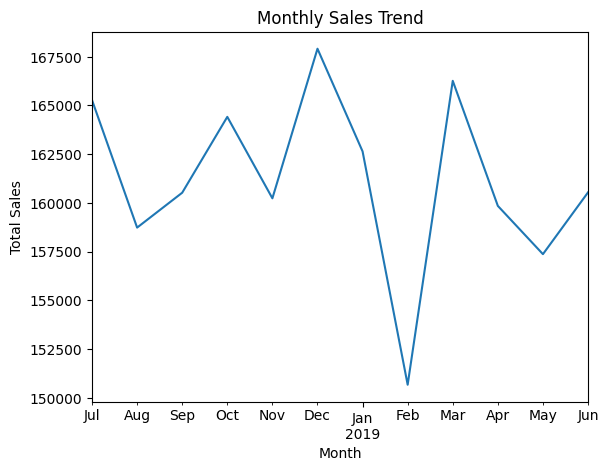

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# 6. Customer Behavior Insights

Average Spend per Customer

In [ ]:
customer_spend = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
customer_spend.describe()

,TOT_SALES
count,72637.000000
mean,26.631262
std,20.814325
min,1.500000
25%,9.100000
50%,21.700000
75%,40.000000
max,1300.000000


Heavy vs Light Customers

In [ ]:
customer_spend.quantile([0.25, 0.5, 0.75, 0.9])

,TOT_SALES
0.25,9.1
0.50,21.7
0.75,40.0
0.90,55.8


# **7. Store Performance**

In [ ]:
store_sales = df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
store_sales.head(10)

,TOT_SALES
STORE_NBR,
226,18905.45
88,16333.25
165,15973.75
40,15559.50
237,15539.50
58,15251.45
199,14797.00
4,14647.65
203,14551.60
